## load data from tinberg app

http://dev.pawelsz.eu/2016/05/read-from-file-length-prefixed-protocol.html

In [1]:
from io import BufferedReader, open
from google.protobuf.internal import decoder
from protobuf_to_dict import protobuf_to_dict

In [2]:
def ReadItm(fname, constructor, size_limit = 0):
    f = open(fname, 'rb')
    reader = BufferedReader(f)
    bytes_read = 0
    while size_limit<=0 or bytes_read<size_limit:
        buffer = reader.peek(10)
        if len(buffer) == 0:
            break
        (size, position) = decoder._DecodeVarint(buffer, 0)
        reader.read(position)
        itm = constructor()
        itm.ParseFromString(reader.read(size))
        bytes_read = bytes_read + position + size
        yield protobuf_to_dict(itm)
    f.close()

### load protobufs

To make 

protoc --python_out=../python behavior.proto

In [3]:
cd './python'

/Users/sofroniewn/Github/tinberg-app/experiment/python


In [4]:
import behavior_pb2

In [5]:
cd ..

/Users/sofroniewn/Github/tinberg-app/experiment


### load behavior

In [6]:
pwd

u'/Users/sofroniewn/Github/tinberg-app/experiment'

In [28]:
#fname = '../logs/000005/behavior/behavior.data'
fname = './logs/behavior.data'
constructor = behavior_pb2.Data

from pandas import DataFrame
behavior = DataFrame(ReadItm(fname, constructor))

## Plot timeseries

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

(0, 10)

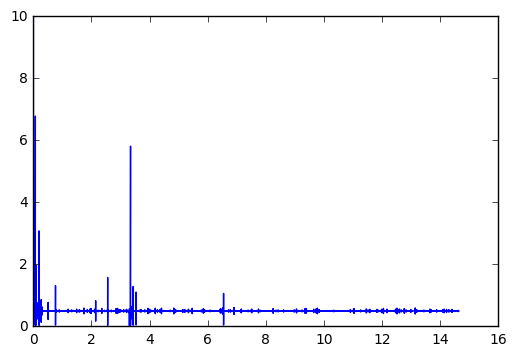

In [29]:
plt.plot(behavior.time/1000, behavior.delta);
plt.ylim([0, 10])

In [30]:
from numpy import percentile

print behavior[2:].delta.max()
print percentile(behavior[2:].delta, 99.99)
print percentile(behavior[2:].delta, 99.9)
print percentile(behavior[2:].delta, 99)
print behavior[2:].delta.mean()

6.78609991074
3.14442013051
0.706658424735
0.506503053904
0.499729875669


### load trials

In [78]:
fname = './logs/000001/behavior/trial.data'
constructor = trial_pb2.Data

In [81]:
trials = list(ReadItm(fname, constructor))

### Plot maze